In [1]:
import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy.cluster.hierarchy as hc
from pyclustering.cluster.xmeans import xmeans
from chunk_utils import *
data_dir = './data/names'
image_dir = './images/'

In [2]:
# basic init
filenames = list(filter(lambda x: x.endswith('.kdt'), os.listdir(data_dir)))
matplotlib.rcParams['figure.figsize'] = 8,5
%load_ext autoreload
%autoreload 2

In [3]:
with open(data_dir+'//'+filenames[4], 'r') as fh:
    mydata = fh.read()
typedname, rawkd = mydata.split('\n')
keypairs = list(map(lambda x: x[0]+x[1], zip(typedname, typedname[1:])))


raw_delays = kdata2delaysOLD(typedname, rawkd)
cumulative_delays = np.array([np.cumsum(delay1) for delay1 in raw_delays])


raw_delays = raw_delays.transpose()
cumulative_delays = cumulative_delays.transpose()

len(typedname), typedname, raw_delays.shape, cumulative_delays.shape

(20, 'curb your enthusiasm', (19, 20), (19, 20))

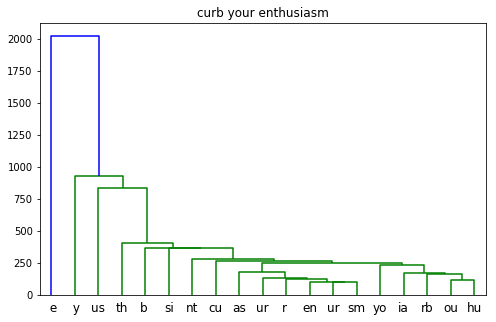

In [4]:
zz1 = hc.linkage(raw_delays,'single')
plt.title(typedname)
dn = hc.dendrogram(zz1, labels=keypairs)

Text(0.5,1,'curb your enthusiasm')

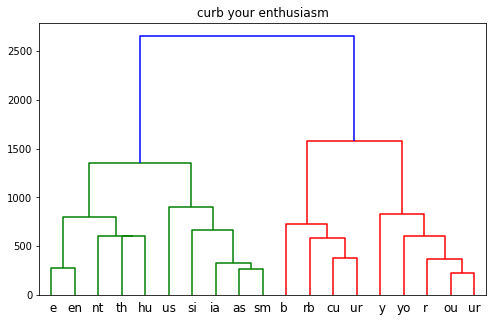

In [5]:
zz2 = hc.linkage(cumulative_delays,'single')
dn = hc.dendrogram(zz2, labels=keypairs)
plt.title(typedname)

In [6]:
clus = xmeans(cumulative_delays)
clus.process()
cluster_ids = clus.get_clusters()

In [7]:
len(cluster_ids)

14

In [8]:
cluster_ids

[[0, 1, 2, 3],
 [4],
 [5],
 [6],
 [7],
 [8],
 [9],
 [10],
 [11],
 [12],
 [13],
 [14],
 [15],
 [16, 17, 18]]

In [9]:
centers = clus.get_centers()

In [10]:
for c in centers:
    print (len(c), c)

20 [372.0, 337.0, 282.25, 314.0, 349.5, 304.5, 373.5, 272.0, 332.75, 283.25, 368.75, 292.5, 259.75, 298.25, 308.25, 330.0, 390.0, 371.0, 567.25, 204.0]
20 [696.0, 760.0, 640.0, 720.0, 857.0, 637.0, 1069.0, 840.0, 676.0, 651.0, 1065.0, 587.0, 651.0, 692.0, 1273.0, 644.0, 1064.0, 843.0, 1212.0, 812.0]
20 [876.0, 936.0, 824.0, 896.0, 1028.0, 820.0, 1252.0, 1012.0, 852.0, 819.0, 1262.0, 768.0, 852.0, 871.0, 1476.0, 841.0, 1248.0, 1040.0, 1400.0, 1004.0]
20 [1008.0, 1072.0, 953.0, 1031.0, 1157.0, 949.0, 1373.0, 1131.0, 972.0, 952.0, 1390.0, 904.0, 995.0, 1011.0, 1616.0, 968.0, 1376.0, 1207.0, 1540.0, 1148.0]
20 [1036.0, 1120.0, 1000.0, 1095.0, 1197.0, 1013.0, 1420.0, 1184.0, 1011.0, 984.0, 1453.0, 943.0, 1063.0, 1059.0, 1657.0, 1005.0, 1408.0, 1267.0, 1616.0, 1196.0]
20 [1118.0, 1192.0, 1069.0, 1163.0, 1284.0, 1088.0, 1513.0, 1268.0, 1095.0, 1064.0, 1521.0, 1084.0, 1143.0, 1144.0, 1729.0, 1092.0, 1480.0, 1356.0, 1696.0, 1256.0]
20 [1319.0, 2384.0, 1636.0, 2267.0, 1661.0, 1313.0, 1652.0, 181